
**Model Training** - The purpose of this assignment is to apply your knowledge of machine learning to **two** different datasets. For each dataset, you will train a model to achieve a reasonable performance. You may use trial and error process or search strategies (e.g., Grid search) to fine-tune your model. If you are making any choice or trade-off, document it in your notebook. Documentations should be added as a text cell to your notebook.

**Presentation** - Create a summary of your findings and present it in a format of your choice (short video, short report, a few presentation slides, etc.)

**Reflection** - Finally, add your contribution statement and self assessment to your notebook.


# Your Tasks

## Mental Disorder Dataset

Mental Health is an important issue. It must be taken seriously and treated appropriately. Using historical data collected from people diagnosed with Mania Bipolar Disorder (Bipolar Type-1), Depressive Bipolar Disorder (Bipolar Type-2), Major Depressive Disorder, and Normal Individuals, your task is to build a model that can detect the type of mental disorder. The Normal category refers to the individuals who may have minor mental problems, but they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.

Your model will be used in as a tool that will help psychiatrists in their decision making process.

A collection of 120 Psychology Patients with 17 Essential Symptoms is prepared.
The dataset contains the 17 essential symptoms psychiatrists use to diagnose the described disorders. The behavioral symptoms are considered the levels of patients Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration.


This is a classification problem

### Install and import dependencies

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
dataframe = pd.read_csv("Mental-Health.csv")

In [ ]:
dataframe.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


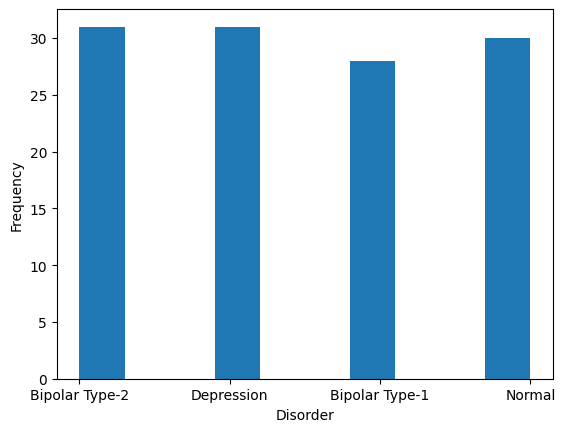

In [ ]:
plt.hist(dataframe["Expert Diagnose"])
plt.xlabel("Disorder")
plt.ylabel("Frequency")

plt.show()

## Wine Quality dataset

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

The wine quality dataset is larger than the mental health disrder datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.

Train a regression model OR a 3-class classifier (low, medium, high quality). To train a 3-class classifier, you must re-label the data. You may choose the cut-off points for each class.

This is a classification or regression problem

In [ ]:
white_wine_csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(white_wine_csv, sep=';')

# Inspect the dataset
wine_data.info()
wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Note that the wine quality dataset is **unbalanced**, with many more samples in the "medium" quality categories than at the extremes.

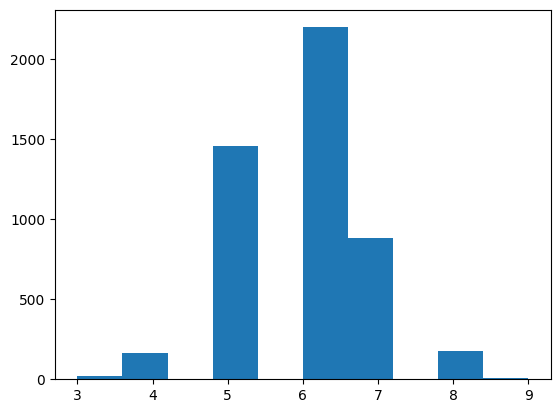

In [ ]:
plt.hist(wine_data['quality'], bins=10)
plt.show()

## Reflection

**Contribution statement**: Briefly explain the contribution of each member to the assignment.



**Self assessment**: In your opinion, what are the deficiencies in your work that need to be improved?

# Marking Rubric



The following table provides a summary of how your assignment will be marked. Your results will not be ranked against each other; what counts is reasonable choices and description of your thought processes.

<table>
<tr>
<th>Item</th>
<th>Points</th>
</tr>

<tr>
<td>The training process for dataset 1</td>
<td>20</td>
</tr>

<tr>
<td>The training process for dataset 2</td>
<td>24</td>
</tr>

<tr>
<td>Documentation of the process and choices made </td>
<td>20</td>
</tr>

<tr>
<td>Overall code quality</td>
<td>10</td>
</tr>

<tr>
<td>Presentation</td>
<td>16</td>
</tr>

<tr>
<td>Reflection</td>
<td>10</td>
</tr>


<tr>
<td><b>Total:</b></td>
<td><b>100</b></td>
</tr>

</table>